***

 <h1><center>Machine Learning - Boston Housing Dataset</center></h1> 

***


![Boston](https://datasmarts.net/wp-content/uploads/2017/12/boston.jpeg)

## Introduction

Boston Housing dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was originally published by Harrison, D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.[1]

In this study Harrison and Rubinfield look at the problems associated with using housing market data for measuring the willingness to pay for clean air. MEDV, the median value of house prices is the dependent variable in this study and NOX, the nitrate oxides concentration is an indendent variable and a measure of air pollution. The paper makes the assumtpion that 
people will pay for better air pollution reflected in the housing value and go on to build a housing model to peredict if this is indeed the case.[2]

My reasearch into the boston housing dataset has shown that is a popular machine learning dataset and commonly referenced
in data science articles. Most of the articles focus on the variables with the highest correlation coefficient and
then go on to do some linear regression modelling.  [3][4][5]. In an artice by Ritie Ng, he notes an intereseting point that
"16 data points have an 'MEDV' value of 50.0. These data points likely contain missing or censored values and have been removed".[6] 

Within the dataset , there are 506 rows, 14 attributes with the MEDV usually being the target attribute. The definitions of these attributes are outlined in the cells below. 


Next I will outline the project requirements:

![ProjectSpecs.png](https://raw.githubusercontent.com/donalcarr/Datasets/master/ProjectSpecs.png)


As per the project specifications, this notebook will be split into three sections starting with **descriptive** statistics on the
boston housing dataset.

First I will import the libraries needed to carry out my analysis.

In [1]:
#import python libraries for code execution
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 
import scipy.stats as ss

## ***Descriptive Statistics***

Add Notes on what your doing

In [2]:
#dataset is avaiable in the sklearn library so we import form there
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [3]:
#prints the variables and information about the dataset
print(boston_dataset.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
#creates a dataframe for analysing the dataset
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
#.head gives me a view of the first 5 rows in the dataset
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
boston.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [6]:
#add taget variable price to dataset
boston["MEDV"] = boston_dataset.target

In [7]:
#TRANSFORM ROWS TO COLUMNS to get a view of the descriptive statistics for dataset

boston.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


From the above summary statistics below is a description of the stats for the target variable MEDV. 

## MEDV - Median House Value

In [8]:
min_price = boston.MEDV.min()
max_price = boston.MEDV.max()
mean_price = boston.MEDV.mean()
median_price = boston.MEDV.median()
std_dev_price = boston.MEDV.std()

In [9]:
print("Min price: ${}".format(min_price)) 
print("Max price: ${}".format(max_price))
print("Mean price: ${}".format(mean_price)) # error with round function unsure why (TO BE FIXED)
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_dev_price))

Min price: $5.0
Max price: $50.0
Mean price: $22.532806324110698
Median price $21.2
Standard deviation of prices: $9.19710408737982


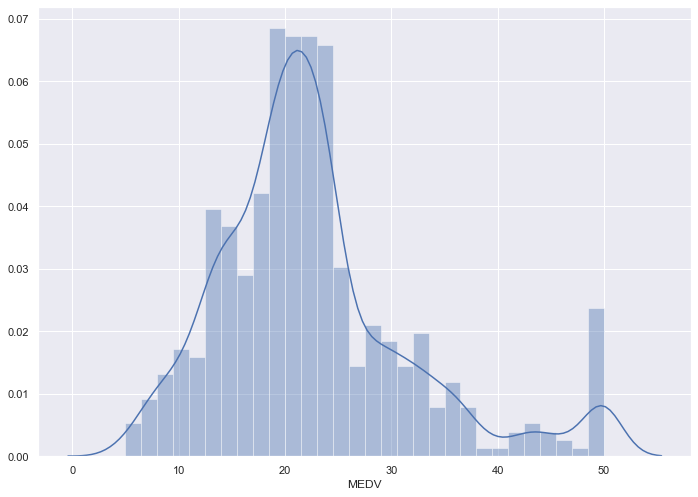

In [10]:
## plot histogram of median house prices to understand the distribution of the data
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

The distribution of the data is close to a normall distribution with some skewness to the right between the 40,000 to 50,000 price range.Most of the data points are between the 10,000 to 30,000 range as per the descriptive statistics above the chart.

Next I will get a more specific view of the outliers using a boxplot chart.

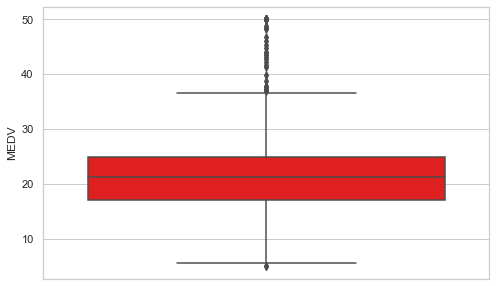

In [11]:
# plot boxplot to understand outliers
fig = plt.gcf()
fig.set_size_inches( 8, 5)
sns.set(style="whitegrid")
sns.boxplot(y="MEDV",data=boston,color="red")

As per the histogram, I can see that the outliers are mostly in the range between 40 to 50 thousand. Interestingly,
one outlier is priced at 5 housand which seems live a very low price for a home.

As previous research into the data suggests that there is a correlation between RM, LSTAT and MEDV I will look at the plots for both of these independent variables.

## LSTAT - Lower status of the population

In [12]:
min_priceLSTAT = boston.LSTAT.min()
max_priceLSTAT = boston.LSTAT.max()
mean_priceLSTAT = boston.LSTAT.mean()
median_priceLSTAT = boston.LSTAT.median()
std_dev_priceLSTAT = boston.LSTAT.std()

In [13]:
print("Min: {}%".format(min_priceLSTAT)) 
print("Max: {}%".format(max_priceLSTAT))
print("Mean: {}%".format(mean_priceLSTAT)) # error with round function unsure why (TO BE FIXED)
print("Median {}%".format(median_priceLSTAT))
print("Standard deviation: {}%".format(std_dev_priceLSTAT))

Min: 1.73%
Max: 37.97%
Mean: 12.653063241106723%
Median 11.36%
Standard deviation: 7.141061511348571%


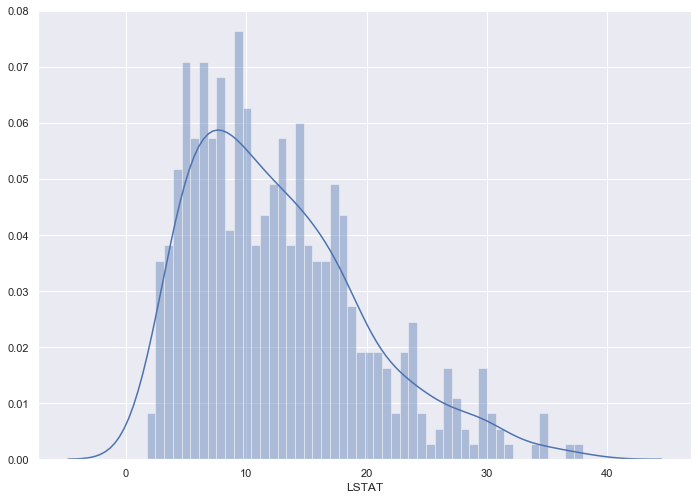

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['LSTAT'], bins=50)
plt.show()

The distribution of the LSTAT is right skewed and this can be seen visually through the longer tail to the right 
and typicaaly the mean is greater than the median in right skewed distributions and this is the case here.

Mean 12.65% > Median 11.36%

LSTAT indicates the proportion of the population in that neigbourhood that are deemed to be of lower status. We can see that 
on average 11% of the population in these neighborhoods are deemed to be of lower status with some outliers in the 30 to 40% range[6]

Next I will get a more specific view of the outliers using a boxplot chart.

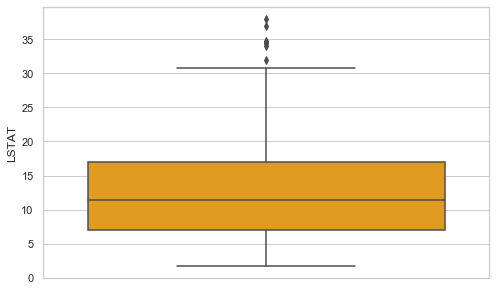

In [15]:
# plot boxplot to understand outliers
fig = plt.gcf()
fig.set_size_inches( 8, 5)
sns.set(style="whitegrid")
sns.boxplot(y="LSTAT",data=boston,color="orange")

We can see that the outliers exist in the 30 to 35% range and most of the neighbourhoods have an LSTAT between 7 and 17%.

The final variable I will investigate is RM average number of rooms per dwellling as this variable also had a strong correlation with MEDV according to previous articles.

## RM - Average number of rooms per dwelling

In [16]:
min_priceRM = boston.RM.min()
max_priceRM = boston.RM.max()
mean_priceRM = boston.RM.mean()
median_priceRM = boston.RM.median()
std_dev_priceRM = boston.RM.std()

In [17]:
print("Min: {}".format(min_priceRM)) 
print("Max: {}".format(max_priceRM))
print("Mean: {}".format(mean_priceRM)) # error with round function unsure why (TO BE FIXED)
print("Median {}".format(median_priceRM))
print("Standard deviation: {}".format(std_dev_priceRM))

Min: 3.561
Max: 8.78
Mean: 6.284634387351787
Median 6.2085
Standard deviation: 0.7026171434153237


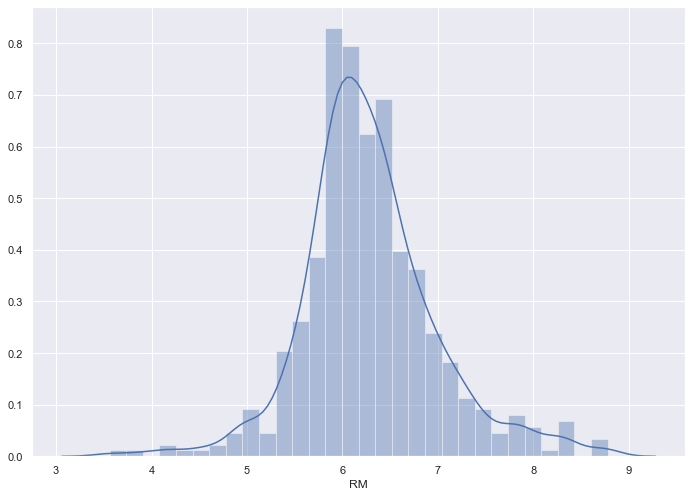

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['RM'], bins=30)
plt.show()

We can see from the above histogram that population is normally distributed and very little skewness. A typical normally distribution
would have an equal median and mean and this case both mean and median are at 6.2 rooms per dwelling. 

Next I will get a more specific view of the outliers using a boxplot chart.

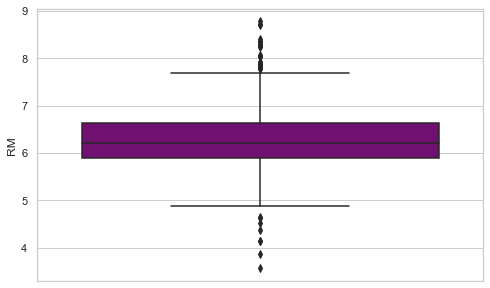

In [19]:
# plot boxplot to understand outliers
fig = plt.gcf()
fig.set_size_inches( 8, 5)
sns.set(style="whitegrid")
sns.boxplot(y="RM",data=boston,color="purple")

Boxplot indicates that the population centres around 6.2 rooms with outliers at over 8 rooms and less than 5. 

Next I will briefly look at the relationships btween the variables and then focus on the category variable CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) and
its relationship to MEDV.

# Inferential Statistics

Intuitively, one would expect the following relationships between LSTAT, RM, CHAS and MEDV:

- linear relationship as more rooms equals more space, hence a higher MEDV

- Where the LSTAT is lower one would expect the MEDV to be lowere as the neighborhhod may have issue with crime etc.

- Houses in neighbourhoods that tracts the river would have higher values due to views of the river and poosibly less 
  congestion
  
Following on from those intuitions I will model the relationships bwtween the variables focusing on CHAS and MEDV relationship.

## Correlation

As already mentioned, previous research has indicated a strong relationship between LSTAT, RM and MEDV and the following
heatmap replicates that view. 

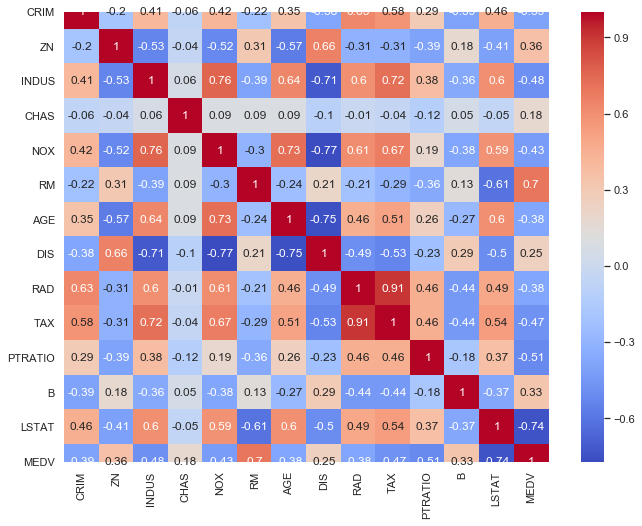

In [20]:
#set plot size
sns.set(rc={'figure.figsize':(11.7,8.27)})
# heatmap for correlation analysis
sns.heatmap(boston.corr().round(2), square=True, annot=True,cmap ='coolwarm')


The strongest positive correlations are displayed in dark green and the strongest negative correlations are displayed
in red - between 1 and minus 1

The dependent variable (target variable) is MEDV (median house value) and the strongest correlation is with
LSTAT (lowest status of the poulation) -0.74 and RM 0.7. A correlation can also be seen between MEDV and RM (0.7) RM and LSTAT (-0.61), but there is no correlation between MEDV and CHAS. 



 Following on from the correlation matrix we can look at a pairplot chart that models the linear relationship between 
 MEDV, LSTAT and RM.

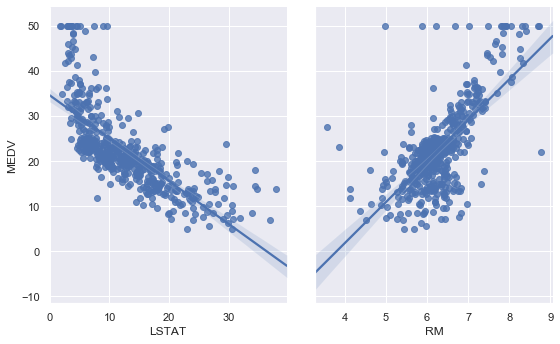

In [21]:
# regression plots
sns.pairplot(boston, x_vars=["LSTAT", "RM"], y_vars=["MEDV"],
            height=5, aspect=.8, kind="reg",palette="husl");


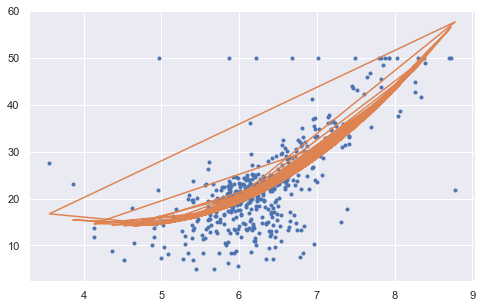

In [143]:
fig = plt.gcf()
fig.set_size_inches( 8, 5)
trend = np.polyfit(boston['RM'],boston['MEDV'],2)
plt.plot(boston['RM'],boston['MEDV'],'.')
trendpoly = np.poly1d(trend) 
plt.plot(boston['RM'],trendpoly(boston['RM']))


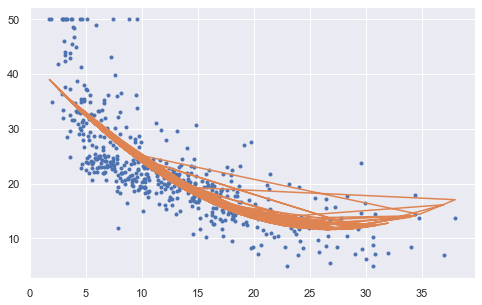

In [145]:
fig = plt.gcf()
fig.set_size_inches( 8, 5)
trend2 = np.polyfit(boston['LSTAT'],boston['MEDV'],2)
plt.plot(boston['LSTAT'],boston['MEDV'],'.')
trendpoly2 = np.poly1d(trend2) 
plt.plot(boston['LSTAT'],trendpoly2(boston['LSTAT']))

We can see that there is a linear relationship between both variables and MEDV, although the population does not completely
follow linearly with some outliers. A negative linear relationship exists between LSTAT and MEDV indicating that house prices
are higher where the LSTAT is lower. 
A positive linear relationship exists between RM and MEDV indicating that house prices are higher for homes with more rooms. 
We can see see outlier in both charts e.g. houses with between 5 and 9 rooms commanding the max MEDV and this could be associated 
with location and build of the house.

## CHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

To start analysing the CHAS variable and its association with MEDV I need to first create a new category variable called CHAScat

In [22]:
## create a new category variable to analyse CHAS
boston["CHAScat"] = boston["CHAS"].astype('category')


Next I want to know how many neighbourhoods bound the river

In [23]:
## get count of neighbourhoods with houses that bounds or does not bound the river
boston.groupby('CHAScat')['MEDV'].count()

CHAScat
0.0    471
1.0     35
Name: MEDV, dtype: int64

I can see that 35 neighbourhoods bound the river while 471 do not. Next I will mean and median to compare house prices and use boxplots to compare the 
median price of houses against the CHAScat variable to see if there is a difference in price. It will also give me a 
a view of the maximum and minimum values of both. 


In [24]:
print("The median house price is:",boston.groupby('CHAScat')['MEDV'].median())
print("The average house price is:",boston.groupby('CHAS')['MEDV'].mean())

The median house price is: CHAScat
0.0    20.9
1.0    23.3
Name: MEDV, dtype: float64
The average house price is: CHAS
0.0    22.093843
1.0    28.440000
Name: MEDV, dtype: float64


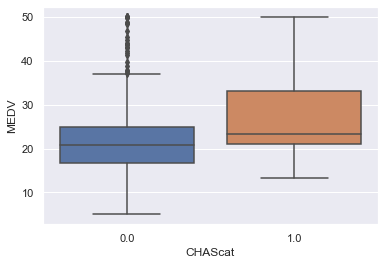

In [25]:
%matplotlib inline
sns.boxplot(x='CHAScat', y='MEDV', data=boston)

The category labels X are defined as follows:
- 1 represents neighbourhoods with land that bounds the river while;
- 0 represents neighbourhoods that don't bound the river.

One would expect that houses closer to the river would have higher median prices and we can see that the median house price is higher for 1 i.e. box plot on the right, although not significantly. 

The interquartile range (25 - 75% percentile) illustrated by the rectangle for category 1 starts and ends much higher, at over 200,000 up to over 300,000 for houses that tract the land. This indicates that land that tracts the river have higher median house values. 

Add commentary on distpolts - kutosis value and so on

In [26]:
tract0 = boston['MEDV'][boston['CHAScat'] == 0]

In [27]:
tract1 = boston['MEDV'][boston['CHAScat'] == 1]

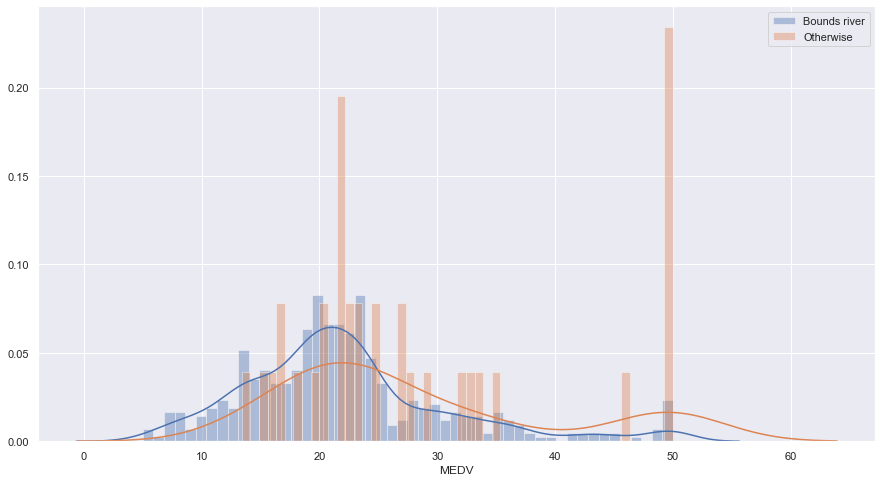

In [28]:
sns.set(rc={'figure.figsize':(15,8)})
sns.distplot(tract0, bins=50, label='Bounds river')
sns.distplot(tract1, bins=50, label='Otherwise')
plt.legend()
plt.show()

## T-Test

The following code cells give us an understanding of both populations i.e. mean, standard deviation of the distribution and
how skewness of the distribution. When conducting a Ttest it is importand understand these basic statistics to choose the
correct TTest. 

I decided to use a welch's Ttest to perform my analysis as the sample sizes will be different, will be unpaired and the  
variance is also different. See cells below for sample sizes, standard devaiation and skewness

The null hypoteseis for this Ttest is that the populations being tested tract 0 (houses not on the river tract) and tract1 (houses on river tract) are not statisticallly significantly different. 

If the P Value is less than 0.5 then we reject the null hypotesis and have more than 95% confidence that the conclusion of the test will be valid and not just down to random chance.

In [29]:
##check for similar standard deviations 
boston.groupby('CHAScat')['MEDV'].std()

CHAScat
0.0     8.831362
1.0    11.816643
Name: MEDV, dtype: float64

In [30]:
##check for similar means
boston.groupby('CHAScat')['MEDV'].mean()

CHAScat
0.0    22.093843
1.0    28.440000
Name: MEDV, dtype: float64

In [31]:
##check population sizes
boston.groupby('CHAScat')['MEDV'].count()

CHAScat
0.0    471
1.0     35
Name: MEDV, dtype: int64

In [32]:
##check for similar variances in population
boston.groupby('CHAScat')['MEDV'].skew()

CHAScat
0.0    1.056908
1.0    0.943012
Name: MEDV, dtype: float64

In [33]:
import matplotlib.patches as mpatches

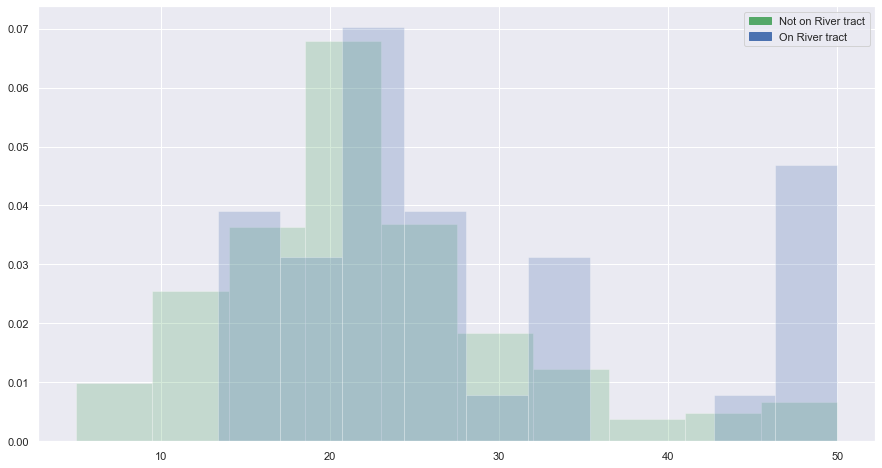

In [34]:
green_patch = mpatches.Patch(color='g', label='Not on River tract')
blue_patch = mpatches.Patch(color='b', label='On River tract')

plt.hist(tract0, density=True, color='g', alpha=0.25)
plt.hist(tract1, density=True, color='b', alpha=0.25)

plt.legend(handles=[green_patch,blue_patch])

In [35]:
#implement independent ttest
ss.ttest_ind(tract0,tract1,equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

We can see that the pvalue is less than 0.5 and the null hypotesis can be rejected. Although both distributions
over the median house values in both populations is statistically siginificantly different. 

## Predict using Keras Neural Networks

![Neuron](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Keras+Python+Tutorial/content_content_neuron.png)

#### What is a Neural Network? 

"Neural networks are a set of *algorithms*, modeled loosely after the human brain, that are designed to *recognize patterns*. 
They interpret sensory data through a kind of machine perception, labeling or clustering raw input. 
The patterns they recognize are *numerical*, contained in *vectors*, into which all real-world data, be it images, sound, text or 
time series, must be translated." [9]

Neural networks were first proposed in 1944 by Warren McCullough and Walter Pitts, two University of Chicago researchers who moved to MIT in 1952 as founding members of what’s sometimes called the first cognitive science department. [10] 

Although neural networks have been around for 70 years their application has been bolstored by the increasing processing power of computer chips.

#### How does a Neural Network work?

Modeled loosely on the human brain, a neural net consists of thousands or even millions of simple processing **nodes** that are densely interconnected. Most of today’s neural nets are organized into **layers of nodes**, 
and they’re **feed-forward,** meaning that data moves through them in only one direction. 
An individual node might be **connected to several nodes** in the layer beneath it, from which it receives data, and several nodes in the layer above it, to which it sends data.




To each of its incoming connections, a node will assign a number known as a **weight**. 
When the network is active, the node receives a different data item — a different number — over each of its connections and multiplies it by the associated weight. 

It then adds the resulting products together, yielding a single number. 

If that number is below a threshold value, the node passes no data to the next layer. 

If the number exceeds the threshold value,the node **fires** which in today’s neural nets generally means
sending the number — the **sum of the weighted inputs** — along all its outgoing connections.[10]

It is important to explain two functions that can radically change the output from your nodes and they are called the:

     -  activation function and;
     -  optimisation function
    


#### Activation function

It is important to apply an activation function to introduce **non-linear** processing between the nodes otherwise
nodes would do their processing linearly paasing output to to the next node and you would end up with a linear model i.e. 
linear regression. If the relationships between the variables are non-linear ther model will not train correctly as it will bypass datapoints not following a linear pattern resultung in **underfitting** which I will discuss shortly. Some commonly used activation functions are:
    - CUBE
    - RELU
    - SIGMOID
    - SOFTMAX
    - TANH
    
Further on I will explain more about these functions as I will be using **RELU** as the activation function for my neural
.

#### Optimisation function

Optimisation functions play an important role in **minimising the loss** in the neural networks training process by for example 
rebalancing the weights according to the error produced from the output in each node. [11] Some commonly used functions are:

    - ADADELTA
    - ADAGRAD
    - ADAM
    - SGD
    - LINE GRADIENT DESCENT
       
Further on I will explain more about these functions as I will be using **Adam** as the optimisation function for my neural
network

#### Loss , Epochs and Batch size

**Loss:** It is a method to evaluate how well an algorithm models the data passed into the neural network.
      Loss is usually classifed into two categories: **Classification** and **regression**; and depending on the relationships
      between the variables you will choose an appropriate loss function, although not an exact science, yet! 
      Loss functions go hand in hand with optimisation function and ideally they should **learn to reduce error in predictions**
      as neural network goes through various iterations of learning. [13] I will be using **Mean Absolute error** as the loss function for my model with an explanation of the function further on.

**Epochs:** Epochs is the number of times the the learning algorithm will work through the entire dataset. For each epoch the learning algorithm's internal paramaters will ideally be fine tuned resulting in an improved loss on each iteration. 

**Batch:** The batch size determines how many samples the learning algorithm should pass over before the model is updated. Learning algorithm passes through each batch updating model parameters before moving onto the next epoch. As with epochs you need to adjust the batch sizes to see if the loss improves. [14]

#### Underfitting and Overfitting models

In lahmens terms a model is underfitted when it **fails to learn the relationships** between the data i.e. 
we get a linear relationship rather than a more curve linear relationship.

A model is overfitted when there is **too much reliance** on the training data i.e. is too rigid and is of no use when random data
is passed into the model. 

Therea are techniques to evaluate the performance of the model including holding back a **vaildation set** and a method called **cross-validation.** A validation set can be referred to as a pre-test where our training model is tested before being released on
the test data. This gives the model a chance to improve its learning by validating the data on each iteration through the data. Using cross validation we split the training data into different subsets, or we can use multiple validation sets if we have lots of data.[15]

#### Neural Networks and their application in real life

**Classification**

They typically use cross sectional data. Solving these problems entails ‘learning’ patterns in a data set and constructing a model that can recognize these patterns. Commercial artificial neural network applications of this nature include:

    - Credit card fraud detection reportedly being used by Eurocard Nederland, Mellon Bank, First USA Bank
    - Petroleum exploration being used by Texaco and Arco to determine locations of underground oil and gas deposits
    
**Time Series**

Typically used build a forecasting model from the historical data set to predict future data points. Applications include:

    - Foreign exchange trading systems: Citibank London
    - Forecasting weather patterns
    
**Optimisation**

Used for finding solutions for a set of very difficult problems known as Non-Polynomial (NP) complete problems. These problem require unsupervised learning approaches i.e. the model does not have outputs to train itself. Examples as follows:

    - job-scheduling in manufacturing and; 
    - efficient routing problems involving vehicles or telecommunication [12]



## Neural Network  - Median House Values

In this section I will attempt to train and predict Median House Values using a neural network model. As LSTAT and RM have the strongest correlation with MEDV I will use these variables as the inputs to the network and 
create two hidden layers to train the network with one output - MEDV. 

Keras Library will be used as it makes the process of building a neural network much easier. It has been broadly adopted by the
research and industry community with over 250,000 users in 2018. [7]

In [36]:
import keras as kr

import sklearn.preprocessing as pre
# For splitting data sets.
import sklearn.model_selection as mod
# For whitening.
import sklearn.decomposition as dec

Using TensorFlow backend.


In [37]:
#inputs for training the model
inputs = boston[['RM','LSTAT']]
inputs.head()

,RM,LSTAT
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33


In [38]:
# outputs for training the neural network
outputs = boston['MEDV']
outputs.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [39]:
x_train, x_test, y_train, y_test = mod.train_test_split(inputs, outputs, test_size=0.3)

In [83]:
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(354, 2) (354,)
(152, 2) (152,)


Now I will create a neural network using the following keras methods:
    
    - kr.models.Sequential: A sequential model that adds layers sequentially on top of the existing layers
    - kr.layers.Dense:  Dense ensures that all the neurons in each layer are connected
    - actiavation: sigmiod is a non-linear funtion with the advantage that the output from the network will always be in range (0,1)
    - activation: linear is a straight line function where activation is is proportional to input and is suitable for this model
        because of the linear relation MEDV has with RM and LSTAT
    - 

In [112]:
# Create a new neural network.
m = kr.models.Sequential()

# Add a single neuron in a single layer, initialised with weight 1 and bias 0.
m.add(kr.layers.Dense(100, input_dim=2, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(50, activation="relu"))
m.add(kr.layers.Dense(1))
# Compile the model.
m.compile(loss="mean_absolute_error", optimizer="Adam")

In [113]:
history = m.fit(x_train, y_train, epochs=50, batch_size=25,validation_split=0.1)

Train on 318 samples, validate on 36 samples
Epoch 1/50
318/318 [==============================] - 1s 3ms/step - loss: 19.0055 - val_loss: 15.3155
Epoch 2/50
318/318 [==============================] - 0s 270us/step - loss: 13.3137 - val_loss: 10.7355
Epoch 3/50
318/318 [==============================] - 0s 233us/step - loss: 11.7990 - val_loss: 9.3647
Epoch 4/50
318/318 [==============================] - 0s 195us/step - loss: 9.5286 - val_loss: 6.7755
Epoch 5/50
318/318 [==============================] - 0s 170us/step - loss: 6.1158 - val_loss: 4.9676
Epoch 6/50
318/318 [==============================] - 0s 201us/step - loss: 3.9260 - val_loss: 4.6284
Epoch 7/50
318/318 [==============================] - 0s 185us/step - loss: 3.7609 - val_loss: 5.1209
Epoch 8/50
318/318 [==============================] - 0s 214us/step - loss: 3.7271 - val_loss: 4.4060
Epoch 9/50
318/318 [==============================] - 0s 226us/step - loss: 3.5831 - val_loss: 4.1441
Epoch 10/50
318/318 [=============

In [99]:
m.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 100)               300       
_________________________________________________________________
dense_26 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_27 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 51        
Total params: 15,501
Trainable params: 15,501
Non-trainable params: 0
_________________________________________________________________


In [131]:
predictions = m.predict(x_test).T

In [134]:
##turns pandas series into numpy array
y_test.as_matrix()

C:\Users\Donal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([19.8, 13.1, 28.7, 21.7, 23.7, 24.1, 28.4, 14.5, 24.2, 19.8, 31.1,
       16.1, 19.4, 18.2, 23.8, 10.9, 27.5, 42.8, 21. ,  6.3, 23.3, 43.5,
       27.9, 16.6, 14.4, 20.4, 34.9, 21.1, 16.3,  9.5, 21.2, 15. , 22.2,
       30.1, 37. , 13.6, 28.7, 15.2, 20.3, 19.7, 50. , 16. , 18.9, 29.1,
       11.5, 19.6, 26.5, 50. ,  7. , 20.6, 13.3, 28.7, 48.5, 18.7, 18.1,
       34.9, 39.8, 24.6, 20. , 30.1, 12.1, 23.1, 24.7, 21.5, 18.7, 29.8,
       23.4, 17.4, 21. , 24.1,  9.6, 46.7, 20.3, 22. , 20.1, 19.6, 14.3,
       15.6, 10.2, 45.4, 22.5, 24.5,  9.7,  7.4, 21.8, 23.6, 19.3, 11.8,
       46. , 23.9, 20.6, 17.4, 15.7, 12.6, 13.4, 15. , 24.3, 41.7, 10.2,
       22.6, 18.3, 26.6, 32. , 13.8, 16.2, 20.2, 16.5, 17.2, 19. , 50. ,
       22.6, 13. , 19.4, 25. , 21.4, 17.1, 21.4, 18.9, 23.9, 19.5, 22.6,
       30.8, 23.7, 18.5, 17.8, 23. , 26.6, 21.4, 31.6, 25. , 20.6, 50. ,
       22.9, 17.1, 20.5, 15.4, 22.9, 37.3, 21.9, 25.1, 19.6, 36. , 18.6,
       13.8, 11.7, 20.4, 21.7, 23.2, 14.9,  5.6, 22

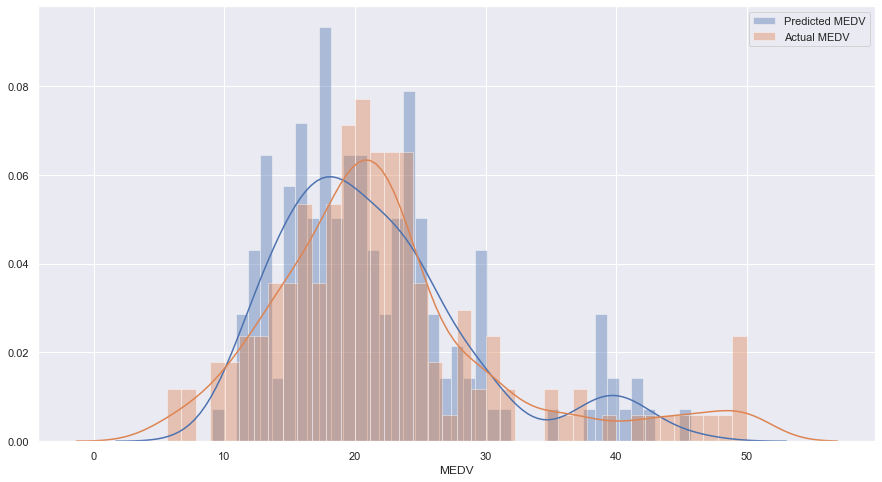

In [135]:
##Predicted MEDV vs Actual EDV
sns.distplot(predictions, bins=40, label='Predicted MEDV')
sns.distplot(y_test, bins=40, label='Actual MEDV')
plt.legend()
plt.show()

In [116]:
print(history.history.keys())

dict_keys(['val_loss', 'loss'])


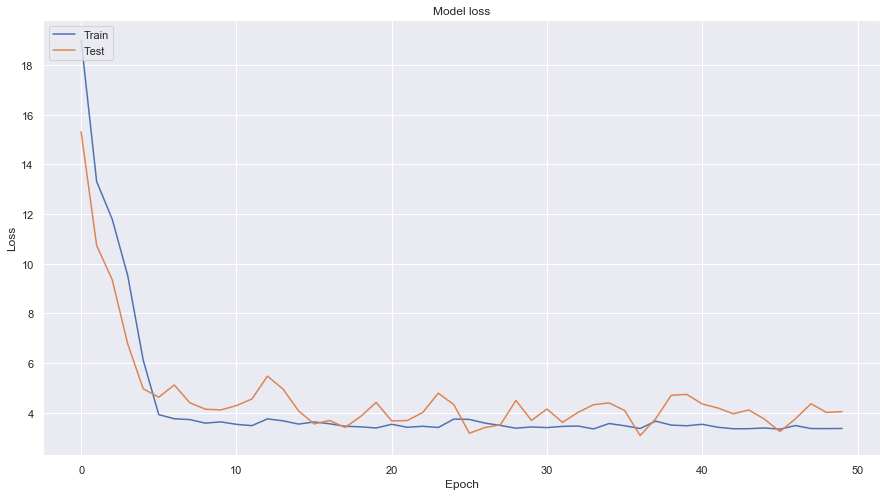

In [114]:
##https://keras.io/visualization/
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

C:\Users\Donal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([19.8, 13.1, 28.7, 21.7, 23.7, 24.1, 28.4, 14.5, 24.2, 19.8, 31.1,
       16.1, 19.4, 18.2, 23.8, 10.9, 27.5, 42.8, 21. ,  6.3, 23.3, 43.5,
       27.9, 16.6, 14.4, 20.4, 34.9, 21.1, 16.3,  9.5, 21.2, 15. , 22.2,
       30.1, 37. , 13.6, 28.7, 15.2, 20.3, 19.7, 50. , 16. , 18.9, 29.1,
       11.5, 19.6, 26.5, 50. ,  7. , 20.6, 13.3, 28.7, 48.5, 18.7, 18.1,
       34.9, 39.8, 24.6, 20. , 30.1, 12.1, 23.1, 24.7, 21.5, 18.7, 29.8,
       23.4, 17.4, 21. , 24.1,  9.6, 46.7, 20.3, 22. , 20.1, 19.6, 14.3,
       15.6, 10.2, 45.4, 22.5, 24.5,  9.7,  7.4, 21.8, 23.6, 19.3, 11.8,
       46. , 23.9, 20.6, 17.4, 15.7, 12.6, 13.4, 15. , 24.3, 41.7, 10.2,
       22.6, 18.3, 26.6, 32. , 13.8, 16.2, 20.2, 16.5, 17.2, 19. , 50. ,
       22.6, 13. , 19.4, 25. , 21.4, 17.1, 21.4, 18.9, 23.9, 19.5, 22.6,
       30.8, 23.7, 18.5, 17.8, 23. , 26.6, 21.4, 31.6, 25. , 20.6, 50. ,
       22.9, 17.1, 20.5, 15.4, 22.9, 37.3, 21.9, 25.1, 19.6, 36. , 18.6,
       13.8, 11.7, 20.4, 21.7, 23.2, 14.9,  5.6, 22

In [106]:
##.T turns rows into columns / get squared mean difference to see difference between the output from model and the dataset outputs
np.sum((m.predict(x_test).T - y_test.as_matrix())**2)

C:\Users\Donal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


2597.087001116458

In [115]:
scores = m.evaluate(x_test, y_test, verbose=0)
print (scores)

3.1930617784198962


## Neural Network 2 using Scaling

In [47]:
scaler = pre.StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)

In [60]:
# Create a new neural network.
m = kr.models.Sequential()

# Add a single neuron in a single layer, initialised with weight 1 and bias 0.
m.add(kr.layers.Dense(100, input_dim=2, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(50, activation="relu"))
m.add(kr.layers.Dense(1))
# Compile the model.
m.compile(loss="mse", optimizer="Adam",metrics=['mae'])

In [61]:
m.fit(x_train_scaled, y_train, epochs=50, batch_size=25)

Epoch 1/50
354/354 [==============================] - 1s 2ms/step - loss: 22.0758 - accuracy: 0.0000e+00
Epoch 2/50
354/354 [==============================] - 0s 203us/step - loss: 20.0615 - accuracy: 0.0000e+00
Epoch 3/50
354/354 [==============================] - 0s 158us/step - loss: 15.5256 - accuracy: 0.0000e+00
Epoch 4/50
354/354 [==============================] - 0s 155us/step - loss: 9.0306 - accuracy: 0.0085
Epoch 5/50
354/354 [==============================] - 0s 186us/step - loss: 6.4113 - accuracy: 0.0028
Epoch 6/50
354/354 [==============================] - 0s 200us/step - loss: 5.0352 - accuracy: 0.0028
Epoch 7/50
354/354 [==============================] - 0s 186us/step - loss: 4.7512 - accuracy: 0.0056
Epoch 8/50
354/354 [==============================] - 0s 155us/step - loss: 4.3134 - accuracy: 0.0056
Epoch 9/50
354/354 [==============================] - 0s 158us/step - loss: 4.1627 - accuracy: 0.0085
Epoch 10/50
354/354 [==============================] - 0s 212us/step 

In [50]:
x_test_scaled = scaler.transform(x_test)
m.predict(x_test_scaled).round().T

array([[17., 15., 24., 17., 26., 22., 25., 14., 23., 21., 28., 15., 17.,
        20., 23., 18., 24., 45., 21., 10., 23., 37., 19., 14., 11., 19.,
        31., 19., 14., 11., 19., 19., 23., 27., 30., 15., 23., 14., 20.,
        19., 42., 18., 19., 26., 14., 20., 26., 49., 12., 21., 12., 31.,
        41., 20., 15., 33., 37., 24., 18., 24., 13., 22., 22., 15., 19.,
        24., 22., 18., 20., 25., 14., 39., 17., 24., 20., 19., 15., 11.,
        12., 41., 23., 22., 12., 11., 19., 30., 20., 11., 39., 21., 22.,
        16., 11., 16., 11., 13., 21., 47., 17., 20., 17., 25., 27., 11.,
        19., 19., 23., 19., 16., 42., 20., 13., 17., 22., 20., 13., 18.,
        20., 25., 17., 20., 26., 11., 20., 15., 23., 29., 22., 31., 23.,
        19., 49., 22., 18., 15., 13., 22., 33., 18., 23., 20., 32., 21.,
        15., 17., 21., 20., 18., 14., 11., 22., 21.]], dtype=float32)

In [51]:
y_test.as_matrix().astype(np.float32)

C:\Users\Donal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([19.8, 13.1, 28.7, 21.7, 23.7, 24.1, 28.4, 14.5, 24.2, 19.8, 31.1,
       16.1, 19.4, 18.2, 23.8, 10.9, 27.5, 42.8, 21. ,  6.3, 23.3, 43.5,
       27.9, 16.6, 14.4, 20.4, 34.9, 21.1, 16.3,  9.5, 21.2, 15. , 22.2,
       30.1, 37. , 13.6, 28.7, 15.2, 20.3, 19.7, 50. , 16. , 18.9, 29.1,
       11.5, 19.6, 26.5, 50. ,  7. , 20.6, 13.3, 28.7, 48.5, 18.7, 18.1,
       34.9, 39.8, 24.6, 20. , 30.1, 12.1, 23.1, 24.7, 21.5, 18.7, 29.8,
       23.4, 17.4, 21. , 24.1,  9.6, 46.7, 20.3, 22. , 20.1, 19.6, 14.3,
       15.6, 10.2, 45.4, 22.5, 24.5,  9.7,  7.4, 21.8, 23.6, 19.3, 11.8,
       46. , 23.9, 20.6, 17.4, 15.7, 12.6, 13.4, 15. , 24.3, 41.7, 10.2,
       22.6, 18.3, 26.6, 32. , 13.8, 16.2, 20.2, 16.5, 17.2, 19. , 50. ,
       22.6, 13. , 19.4, 25. , 21.4, 17.1, 21.4, 18.9, 23.9, 19.5, 22.6,
       30.8, 23.7, 18.5, 17.8, 23. , 26.6, 21.4, 31.6, 25. , 20.6, 50. ,
       22.9, 17.1, 20.5, 15.4, 22.9, 37.3, 21.9, 25.1, 19.6, 36. , 18.6,
       13.8, 11.7, 20.4, 21.7, 23.2, 14.9,  5.6, 22

In [52]:
scores = m.evaluate(x_test_scaled, y_test, verbose=0)
print (scores)

2.7173510852612948


## Neural Network 3 using Whitening

In [53]:
pca = dec.PCA(n_components=2, whiten=True)
pca.fit(x_train)
x_train_white = pd.DataFrame(pca.transform(x_train), columns=inputs.columns)
x_train_white


,RM,LSTAT
0,0.834266,-1.012721
1,0.376671,0.459730
2,0.555576,-2.459915
3,-0.438459,0.728729
4,-1.363287,0.007105
...,...,...
349,0.685519,0.208505
350,1.505040,2.759711
351,-0.359778,0.757598
352,0.641518,0.094344


In [54]:
# Create a new neural network.
m = kr.models.Sequential()

# Add a single neuron in a single layer, initialised with weight 1 and bias 0.
m.add(kr.layers.Dense(100, input_dim=2, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(50, activation="relu"))
m.add(kr.layers.Dense(1))
# Compile the model.
m.compile(loss="mse", optimizer="Adam",metrics=['mae'])

In [55]:
m.fit(x_train_white, y_train, epochs=50, batch_size=25)

Epoch 1/50
354/354 [==============================] - 1s 2ms/step - loss: 22.1304
Epoch 2/50
354/354 [==============================] - 0s 181us/step - loss: 20.5612
Epoch 3/50
354/354 [==============================] - 0s 198us/step - loss: 16.6659
Epoch 4/50
354/354 [==============================] - 0s 203us/step - loss: 9.9501
Epoch 5/50
354/354 [==============================] - 0s 167us/step - loss: 6.2714
Epoch 6/50
354/354 [==============================] - 0s 158us/step - loss: 5.2631
Epoch 7/50
354/354 [==============================] - 0s 158us/step - loss: 4.8737
Epoch 8/50
354/354 [==============================] - 0s 169us/step - loss: 4.4958
Epoch 9/50
354/354 [==============================] - 0s 181us/step - loss: 4.1436
Epoch 10/50
354/354 [==============================] - 0s 189us/step - loss: 3.8857
Epoch 11/50
354/354 [==============================] - 0s 161us/step - loss: 3.6511
Epoch 12/50
354/354 [==============================] - 0s 161us/step - loss: 3.5215


In [56]:
x_test_white = scaler.transform(x_test)
m.predict(x_test_white).round().T

array([[23., 19., 19., 23., 15., 21., 16., 22., 19., 23., 14., 20., 24.,
        31., 19., 21., 15.,  9., 16., 22., 18., 11., 28., 21., 27., 22.,
        13., 24., 28., 18., 23., 28., 21., 14., 13., 21., 16., 20., 25.,
        23., 10., 23., 23., 16., 25., 21., 14.,  9., 31., 21., 16., 13.,
        10., 25., 20., 13., 11., 19., 24., 16., 18., 53., 22., 21., 25.,
        14., 22., 23., 28., 17., 18., 11., 23., 14., 21., 23., 24., 24.,
        19., 10., 21., 19., 27., 27., 28., 13., 26., 28., 10., 23., 28.,
        22., 23., 20., 17., 19., 23.,  9., 23., 22., 22., 16., 14., 28.,
        27., 31., 17., 24., 22., 10., 25., 19., 20., 23., 22., 19., 22.,
        26., 16., 23., 27., 17., 24., 26., 20., 21., 13., 21., 12., 19.,
        24.,  9., 19., 19., 21., 18., 23., 12., 36., 16., 26., 12., 28.,
        26., 21., 26., 24., 19., 16., 21., 20., 19.]], dtype=float32)

In [57]:
y_test.as_matrix().astype(np.float32)

C:\Users\Donal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([19.8, 13.1, 28.7, 21.7, 23.7, 24.1, 28.4, 14.5, 24.2, 19.8, 31.1,
       16.1, 19.4, 18.2, 23.8, 10.9, 27.5, 42.8, 21. ,  6.3, 23.3, 43.5,
       27.9, 16.6, 14.4, 20.4, 34.9, 21.1, 16.3,  9.5, 21.2, 15. , 22.2,
       30.1, 37. , 13.6, 28.7, 15.2, 20.3, 19.7, 50. , 16. , 18.9, 29.1,
       11.5, 19.6, 26.5, 50. ,  7. , 20.6, 13.3, 28.7, 48.5, 18.7, 18.1,
       34.9, 39.8, 24.6, 20. , 30.1, 12.1, 23.1, 24.7, 21.5, 18.7, 29.8,
       23.4, 17.4, 21. , 24.1,  9.6, 46.7, 20.3, 22. , 20.1, 19.6, 14.3,
       15.6, 10.2, 45.4, 22.5, 24.5,  9.7,  7.4, 21.8, 23.6, 19.3, 11.8,
       46. , 23.9, 20.6, 17.4, 15.7, 12.6, 13.4, 15. , 24.3, 41.7, 10.2,
       22.6, 18.3, 26.6, 32. , 13.8, 16.2, 20.2, 16.5, 17.2, 19. , 50. ,
       22.6, 13. , 19.4, 25. , 21.4, 17.1, 21.4, 18.9, 23.9, 19.5, 22.6,
       30.8, 23.7, 18.5, 17.8, 23. , 26.6, 21.4, 31.6, 25. , 20.6, 50. ,
       22.9, 17.1, 20.5, 15.4, 22.9, 37.3, 21.9, 25.1, 19.6, 36. , 18.6,
       13.8, 11.7, 20.4, 21.7, 23.2, 14.9,  5.6, 22

In [58]:
scores = m.evaluate(x_test_white, y_test, verbose=0)
print (scores)

9.799253664518657


## References

[1] Delve 1996, 'The Boston Housing Datset', retrieved from https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html


[2] Harrison, D. & Rubinfeld, D.L. (1978). "Hedonic prices and the demand for clean air", J. Environ. Economics & Management, vol.5, 81-102

[3] Haydar A, "learning-data-science-day-9-linear-regression-on-boston-housing-dataset", retrieved from https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef

[4] Animesh A, "Linear Regression on Boston Housing Dataset", retrieved from https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

[5] Randerson, "Predict Boston House Prices Using Python & Linear Regression", retrieved from https://levelup.gitconnected.com/predict-boston-house-prices-using-python-linear-regression-90469e0a341

[6] Ng R, "Machine-learning-project-boston-home-prices", retrieved from https://www.ritchieng.com/machine-learning-project-boston-home-prices/

[7] 'Why use Keras', retrieved from https://keras.io/why-use-keras/

[8] Sharma AV, 'the-theory-of-everything/understanding-activation-functions-in-neural-networks' retrieved from https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0

[9] Nicholson, C, "A Beginner's Guide to Neural Networks and Deep Learning", retrieved from https://skymind.ai/wiki/neural-network

[10] Hardesty, L, "Explained: Neural networks" retrieved from http://news.mit.edu/2017/explained-neural-networks-deep-learning-0414

[11] Walia, A, "Types of Optimization Algorithms used in Neural Networks and Ways to Optimize Gradient Descent",retreived from
https://towardsdatascience.com/types-of-optimization-algorithms-used-in-neural-networks-and-ways-to-optimize-gradient-95ae5d39529f

[12] Ahire J, "Real world Applications of Artificial Neural Networks", retrieved from https://medium.com/@jayeshbahire/real-world-applications-of-artificial-neural-networks-a6a6bc17ad6a

[13] Parmar, R, "Common Loss functions in machine learning" retrieved from https://towardsdatascience.com/common-loss-functions-in-machine-learning-46af0ffc4d23

[14] Brownlee, J, "difference-between-a-batch-and-an-epoch", retrieved from, https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/

[15]Koehrsen, W,"Overfitting vs. Underfitting: A Complete Example" retrieved from https://towardsdatascience.com/overfitting-vs-underfitting-a-complete-example-d05dd7e19765